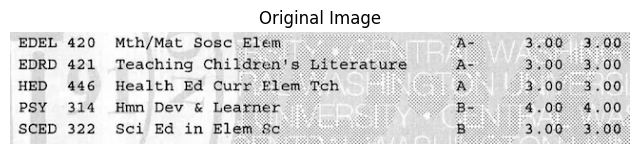

Original OCR Result:
 EDEL 420 Mth/Mat Sosc Eléin AE 3.00 3.00
EDRD 421 Teaching Children's Literature Ap 3,00 3.00
HED 446 Health Ed Curr Elem Tch A 4.00 3.00
PSY 314 Hmn Dev & Learner Be 4.00 4.00
SCED 322 Sci Ed in Elem 8c B 3.00 3.00



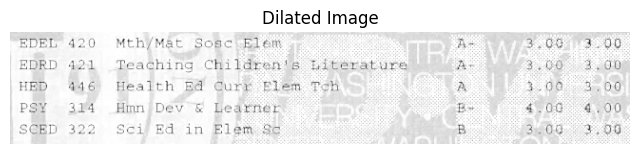

Dilated OCR Result:
 EDEL 420 Mth/Mat Sosciklem Ae 3.06 73.00
EDRD 421 Teaching Children's Literature Ae 3.00 2.00
HED 446 Health BA Cur¥ Elem Toh a 3.00 3,00
PSY 324 Hin Dev & Learner Be 4.08 4.00
SGED 322 ScifEd in Elem ac B 3y00. 3.00.



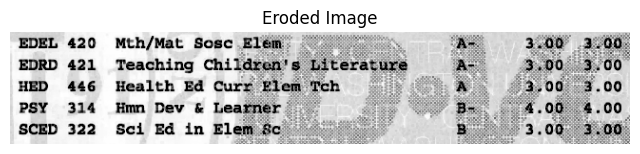

Eroded OCR Result:
 EDEL 420 Mth/Mat Sosc Elém: (9920 0, BF 3-00" 3200:
EDRD 421 Teaching Children's Literature A 3.00° 3.00
HED 446 Health Ed Curr Elem Tch A 3,00 3.00
PSY 314 Hmn Dev & Learner) ~ ‘ B= 4.00 4.00
SCED 322 Sci Ed in Elem &c ae BRB 3.00 3:00"



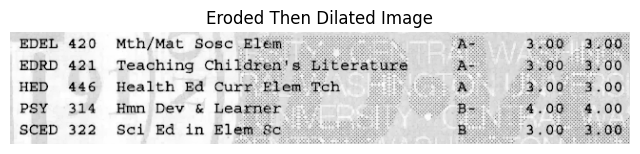

Eroded OCR Result:
 EDEL 420 Mth/Mat Sosc Elém Re 3.00 3.00
EDRD 421 Teaching Children's Literature Ap 3,00 3.00
HED 446 Health Ed Curr Elem Tch A 3.00 3.00
PSY 314 Hmm Dev & Learner B- 4.00 4.00
SCED 322 Sci Ed in Elem &c B 3.00 3.00



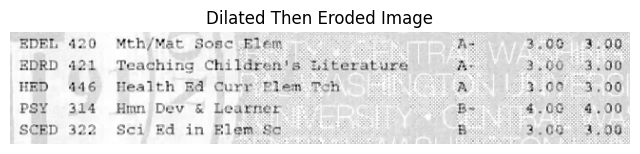

Dilated OCR Result:
 EDEL 420 Mth/Mat Sosc Elém a A: 3.00 3.90:
EDRD 421 Teaching Children's titerature As. 3,004.00
HED 446 Health Bd Curr Flem Tch aA 3.00 3.00
PSY 314 Him Dev & Learner B-  4)o¢ 4.00
SCED 322 Sci Ed in Elem sc. a 3.00. 3,08.



In [26]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Load the image
image_path = '/Users/declanbracken/Development/UofT_Projects/Meng_Project/Transcripts/Test transcripts/2-2048-cropped.png'  # Replace with your image path
image_path = '/Users/declanbracken/Development/UofT_Projects/Meng_Project/Transcripts/Test transcripts/central_washington_cropped.png'
image_path = '/Users/declanbracken/Development/UofT_Projects/Meng_Project/Transcripts/Test transcripts/Screen Shot 2024-09-03 at 5.59.27 PM.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to display images
def show_image(title, img):
    plt.figure(figsize=(8, 8))
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
config = '--psm 6'
# Original OCR Result
original_text = pytesseract.image_to_string(image, config = config)
show_image("Original Image", image)
print("Original OCR Result:\n", original_text)

# 1. Dilation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilated_image = cv2.dilate(image, kernel, iterations=1)
dilated_text = pytesseract.image_to_string(dilated_image, config = config)
show_image("Dilated Image", dilated_image)
print("Dilated OCR Result:\n", dilated_text)

# 2. Erosion
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
eroded_image = cv2.erode(image, kernel, iterations=1)
eroded_text = pytesseract.image_to_string(eroded_image, config = config)
show_image("Eroded Image", eroded_image)
print("Eroded OCR Result:\n", eroded_text)


# 3. Erosion + Dilation
erodeddilated_image = cv2.dilate(eroded_image, kernel, iterations=1)
erodeddilated_text = pytesseract.image_to_string(erodeddilated_image, config = config)
show_image("Eroded Then Dilated Image", erodeddilated_image)
print("Eroded OCR Result:\n", erodeddilated_text)

# 4. Dilation + Erosion
dilatederoded_image = cv2.erode(dilated_image, kernel, iterations=1)
dilatederoded_text = pytesseract.image_to_string(dilatederoded_image, config = config)
show_image("Dilated Then Eroded Image", dilatederoded_image)
print("Dilated OCR Result:\n", dilatederoded_text)

# # 3. OTSU Binarization
# _, otsu_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# otsu_text = pytesseract.image_to_string(otsu_image, config = config)
# show_image("OTSU Binarized Image", otsu_image)
# print("OTSU Binarized OCR Result:\n", otsu_text)
